In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# КЛАСС ПЕРСЕПТРОНА
# # Implementing a perceptron learning algorithm in Python
# ## An object-oriented perceptron API
class Perceptron(object):
    """Perceptron classifier.
    Параметры
    ------------
    eta : параметр скорости обучения (от 0.0 до 1.0)
    n_iter :  номер прохода (итерации) по обучающему набору
    random_state : Начальное значение генератора случайных чисел для 
                                    случайного веса
    Атрибуты (поля) класса
    -----------
    w_ : одномерный массив весовых коэффициентов 
    errors_ : список ошибок классификации в каждой эпохе
    """
#  Метод инициализации полей класса
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

#  Метод обучения
    def fit(self, X, y):
        """
        Параметры
        ----------
        X : входной массив, форма = [n_samples, n_features]
                 n_samples - количество образцов
                 n_features - число признаков
        y : массив целевых значений, форма = [n_samples]
        Возвращает обученный объект персептрона
        """
        # инициализация весов случайными значениями
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        #  Цикл по числу итераций (проходов)
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    #   метод расчета чистого входа
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #  метод определения метки класса по ступенчатой функции активации
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [3]:
# ЗАГРУЗКА И АНАЛИЗ ДАННЫХ
# ## Обучение модели персептрона на наборе данных с цветками ириса

#  Загрузка данных  Iris  из репозитория Калифорнийского университета
#
#   Если набор данных находится в папке локального компьютера, то команда
#   загрузки должна содержать локальный путь к набору данных
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
#  Вывод последних 5 строк
df.tail()



,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


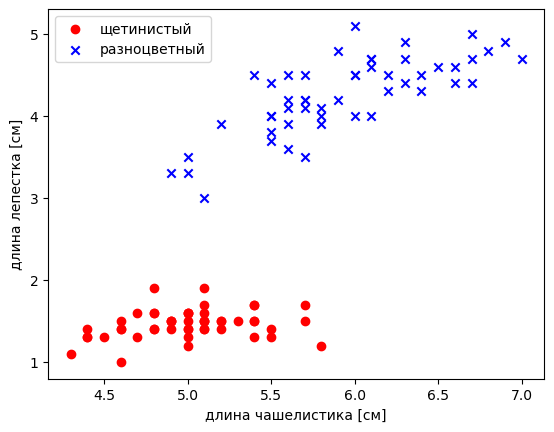

In [5]:
# Выделение последнего столбца с индексом 4 в качестве выходного массива
y = df.iloc[0:100, 4].values
# Перевод выхода в целочисленные метки
y = np.where(y == 'Iris-setosa', -1, 1)

# Выделение первого и третьего столбцов набора данных (длина 
#  чашелистика и длины лепестка) в качестве признаков входного массива
X = df.iloc[0:100, [0, 2]].values

#  Построение точечного графика параметров цветков 
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='разноцветный')

plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')

plt.savefig('02_06.png', dpi=300)
plt.show()


In [ ]:
# СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ
# ### Создание объекта класса персептрона
ppn = Perceptron(eta=0.1, n_iter=10)

#  Обучение модели
ppn.fit(X, y)


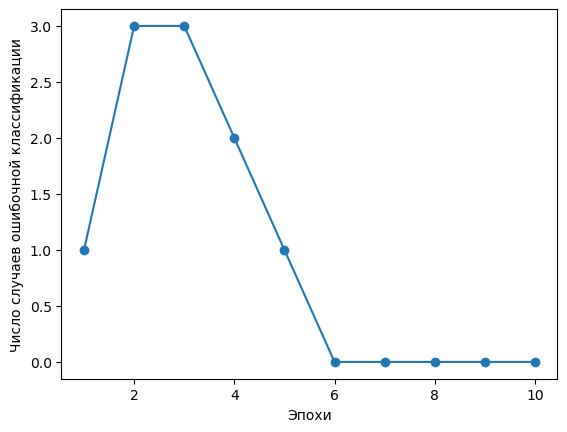

In [ ]:
#  Вывод графика ошибок классификации
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случаев ошибочной классификации')

plt.savefig('02_07.png', dpi=300)
plt.show()


/tmp/ipykernel_7692/3328903637.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


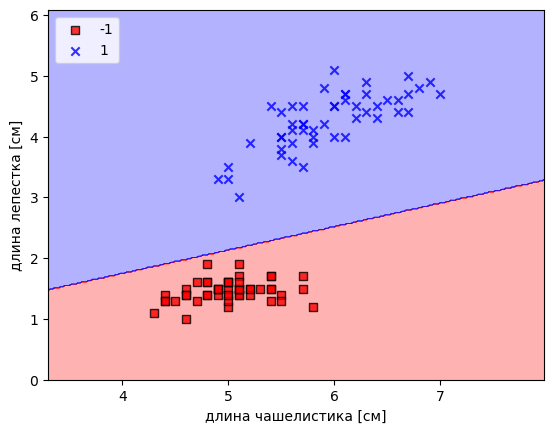

In [ ]:
# ### Вспомогательная функция построения областей решений
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # определение маркеров
    markers = ('s', 'x', 'o', '^', 'v')
    # определение цветовой палитры и цветовой карты областей
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # график поверхности решений
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # вывод образцов классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Вывод графика областей решения
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')


plt.savefig('02_08.png', dpi=300)
plt.show()

